In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import string
from matplotlib.ticker import FuncFormatter

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [54]:
df = pd.read_csv('lego_out.csv', parse_dates = ['year'])

In [55]:
df.columns

Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare',
       'color_name', 'color_rgb', 'color_istrans', 'part_name', 'part_cat_id',
       'ivty_version', 'set_num', 'set_quantity', 'set_name', 'year',
       'theme_id', 'set_parts_count', 'theme_name', 'theme_parent_id',
       'parent_name', 'part_cat_name'],
      dtype='object')

In [128]:
df.groupby('parent_name')['quantity'].sum().head()

parent_name
4 Juniors          417
9V                7011
Advent            1413
Advent Sub-Set    7042
Adventurers       8621
Name: quantity, dtype: int64

In [127]:
def get_yearly_quantity(df):
    """This function takes a dataframe that contains a variable named quantity.
    It outputs a Series containing the sum of quantity by year of that
    variable."""
    
    return df.groupby('year')['quantity'].sum()

In [99]:
d = lambda x: pd.datetime.strptime(x, '%Y')
fin = pd.read_csv('lego_fin.csv', parse_dates = ['year'], date_parser = d)

# Create new columns measuring yearly changes in revenue and change in operating_profit
# Define a function to iterate over rows of dataframe in order to calculate annual change
def year_over_year(df, col):
    change = []
    years = df.year
    for i in range(df.shape[0]-1):
        change.append((df[col][i] / df[col][i+1]) - 1)
    change.append(0)
    return pd.DataFrame(list(zip(years, change)), columns=['year', col+"_growth"])

fin['profit_growth'] = year_over_year(fin, 'operating_profit')["operating_profit_growth"]
fin['revenue_growth'] = year_over_year(fin, 'revenue')["revenue_growth"]

In [144]:
#sort fin dataframe in ascending years
fin = fin.sort_values(by=['year'], ascending=True)
fin.head()

,year,revenue,production_cost,gross_profit,gross_profit%,expenses_sales,expenses_admin,expenses_other,expenses_total,expenses%,...,equity,liabilities,operating_cash_flow,employees,sales_growth_yoy%,operating_margin%,sales_per_emp,fx_usd_to_dkk,profit_growth,revenue_growth
14,2003-01-01,1094,476,619,0.56,536,131,113,780,0.71,...,0,0,0,0,0.00,0.00,0.00,6.58,0.00,0.00
13,2004-01-01,1142,446,673,0.60,480,98,101,678,0.60,...,67,1023,120,5603,-0.07,0.06,0.20,5.99,-1.11,0.04
12,2005-01-01,1188,493,682,0.58,431,100,86,617,0.53,...,94,1082,98,5302,0.05,0.06,0.22,6.00,3.59,0.04
11,2006-01-01,1334,466,850,0.65,439,96,105,641,0.49,...,200,962,195,4908,0.11,0.18,0.27,5.94,1.91,0.12
10,2007-01-01,1516,517,958,0.65,513,106,110,729,0.49,...,308,796,190,4199,0.03,0.18,0.35,5.44,0.19,0.14


### How does revenue growth rate affect profit growth rate?

Text(0,0.5,'USD$K')

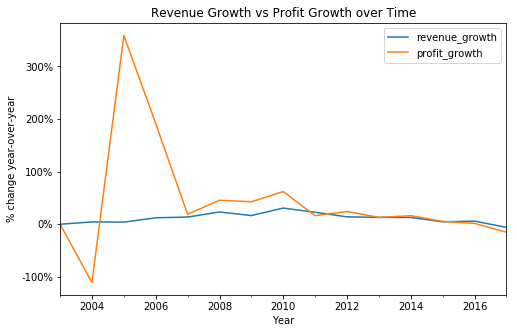

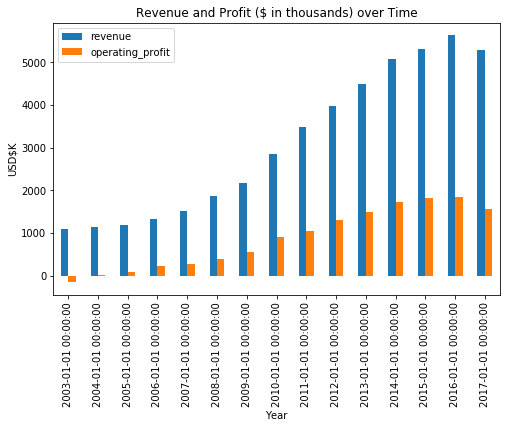

In [147]:
# How does revenue growth rate affect profit growth rate?

ax1 = fin.plot(x="year", y=['revenue_growth', 'profit_growth'], kind="line", figsize=(8,5))
plt.title("Revenue Growth vs Profit Growth over Time")
plt.xlabel("Year")
plt.ylabel("% change year-over-year")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 


fin.plot(x="year", y=["revenue", "operating_profit"], kind="bar", figsize=(8,5))
plt.title("Revenue and Profit ($ in thousands) over Time")
plt.xlabel("Year")
plt.ylabel("USD$K")

### How does revenue growth rate affect profit growth rate?

The chart above shows that profit growth rate varies more significantly than revenue growth rate. The large changes in profit growth rate in 2004 and 2005 indicate that there is a sensitive break-even revenue level ($1.2 billion), after which profitability rises in tandem with revenue growth.

The revenue growth rate in the past 15 years was impressive at average of 12% every year and the profit growth rate moved in tandem, though subject to wider swings.



In [150]:
# Get average revenue growth rate
print("Average revenue growth rate is", fin.revenue_growth.mean())

# Get average profit growth rate
print("Average profit growth rate is", fin.profit_growth.mean())

# Get the year with maximum profit year-on-year growth
print(fin[fin['profit_growth'] == (fin.profit_growth.max())].year)

# For 2005, what was the revenue?
fin[fin.year == '2005'].revenue

Average revenue growth rate is 0.1148133427613257
Average profit growth rate is 0.44689644219201125
12   2005-01-01
Name: year, dtype: datetime64[ns]


12    1188
Name: revenue, dtype: int64

### Further Questions

Which themes coincide with high revenue growth in that year?

Group lego dataset by parent theme and determine how many units per year was sold?

Which lego theme is longest running?

Which lego theme is best selling of all time?